# Exploring Ford GoBike Data
## by Ahmed Magdy

## Preliminary Wrangling

In this file, I'll be investigating the Ford GoBike dataset. By first look into this dataset, it appears to list bike bookigs for a bike sharing service run by Ford. Let's load our data and make some exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> This is a large dataset of 183,412 observations and 16 features/columns. Some columns dtypes need to converted to make this dataset clean, specially the start_time and end_time columns.

### What is/are the main feature(s) of interest in your dataset?

> start_time and end_time columns would give some insights about dates and times of bike booking. member_birth_year and member_gender would provide insights on customers demographics.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, end_time, member_birth_year, member_gender & user type.

### Data Cleaning
1. Need to change the dtype of star_time and end_time into datetime.
2. Birth year and gender are missing in a lot of rows. No need to remove those. Just need to be aware of that limitation.
3. Station information is missing from some rows. Again, no need to remove those. Just need to be aware of that limitation.
4. Some data makes no sense. We have member birth years of pre 1920's times. Granted some people born in these times are alive and well, but I seriously doubt they can ride a bike. I may need to correct some of these years and drop some others.

In [5]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

That's more like it. We may need to extract additional info from those time columns there, but we're now ready to start exploring.

Let's drop observations with birth years starting 1920 downwards. These must be data entry mistakes, but I can't safely assume they should be 100 years later.

In [6]:
df.loc[df.member_birth_year.isna(), 'member_birth_year'] = 3000 #to keep the rows with nulls
df = df[df.member_birth_year > 1920]
df.loc[df.member_birth_year == 3000, 'member_birth_year'] = np.NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183337 non-null  int64         
 1   start_time               183337 non-null  datetime64[ns]
 2   end_time                 183337 non-null  datetime64[ns]
 3   start_station_id         183140 non-null  float64       
 4   start_station_name       183140 non-null  object        
 5   start_station_latitude   183337 non-null  float64       
 6   start_station_longitude  183337 non-null  float64       
 7   end_station_id           183140 non-null  float64       
 8   end_station_name         183140 non-null  object        
 9   end_station_latitude     183337 non-null  float64       
 10  end_station_longitude    183337 non-null  float64       
 11  bike_id                  183337 non-null  int64         
 12  user_type       

## Univariate Exploration

Let's see the ditribution of birth year in our dataset

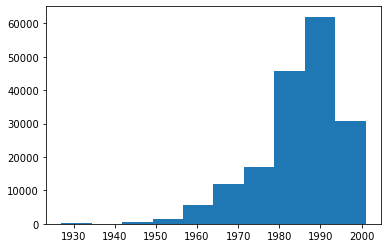

In [7]:
plt.hist(data=df, x='member_birth_year');

As expected, the distribution is skewed to the left, indicating that younger people are more likely to book a bike.

Now, let's look at the distribution of gender

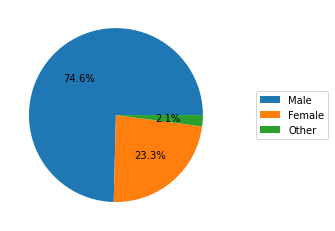

In [8]:
genders = df.member_gender.value_counts()
plt.pie(genders, autopct='%.1f%%')
plt.legend(genders.index, bbox_to_anchor=(1, 0, 0.5, 1), loc="center right");

Wow! Males seem to be absolute majority of our customers.

Next, let's look at the distribution of start_time hour. This should give an indication on which time of the day our customers seem to book the most.

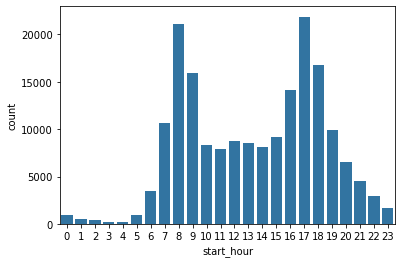

In [9]:
#First, we create a column for the hour 
df['start_hour'] = df.start_time.dt.hour
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_hour', color=base_color);

The spikes at the 8 AM and 5 PM indicate that a lot of people are using our bikes for commuting.

Now, let's see the time and space limits of our data. 

In [10]:
#Time limits
print('First bike trip:', df.start_time.min())
print('Last bike trip:', df.start_time.max())

First bike trip: 2019-02-01 00:00:20.636000
Last bike trip: 2019-02-28 23:59:18.548000


Ok, so our data spans only the month of Febraury 2019

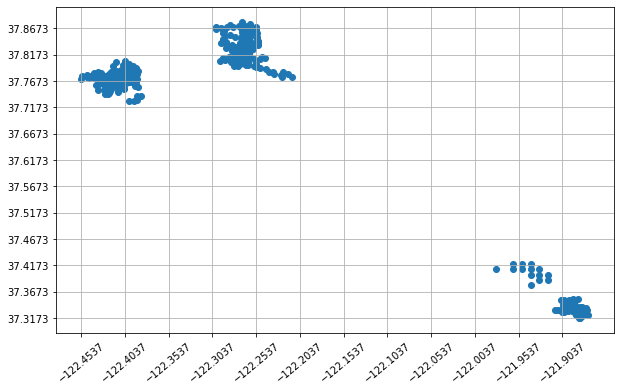

In [11]:
#Space limits
stations = df[[c for c in df.columns if 'start_station' in c]]
plt.figure(figsize=(10, 6))
plt.scatter(data=stations.drop_duplicates(), x='start_station_longitude', y='start_station_latitude') #only uniques
#refine tick marks to differeintiate between cities
plt.xticks(np.arange(df.start_station_longitude.min(), df.start_station_longitude.max(), 0.05), rotation=40)
plt.yticks(np.arange(df.start_station_latitude.min(), df.start_station_latitude.max(), 0.05))
#show grid to make it easier to find cities
plt.grid();

Looks like our stations are located in 3 cities here. Let's find out which by searching the coordinates in Google Maps. I'd also create a city column based on these findings.

In [12]:
#Any point west of longitude -122.3537 is in the first city.
df[df.start_station_longitude < -122.3537].sample()[['start_station_latitude', 'start_station_longitude']]

,start_station_latitude,start_station_longitude
41787,37.780787,-122.421934


That's San Francisco!

In [16]:
#Any point between longitude -122.3537 and -122.2037 is in the second city.
df.query('start_station_longitude > -122.3537 and start_station_longitude < -122.2037').sample()[['start_station_latitude', 'start_station_longitude']]

,start_station_latitude,start_station_longitude
168044,37.800214,-122.25381


That's Berkeley, California.

In [17]:
#Any point south of latitude 37.4673 is in the third city
df.query('start_station_latitude < 37.4673').sample()[['start_station_latitude', 'start_station_longitude']]

,start_station_latitude,start_station_longitude
134862,37.335885,-121.88566


That's San Jose

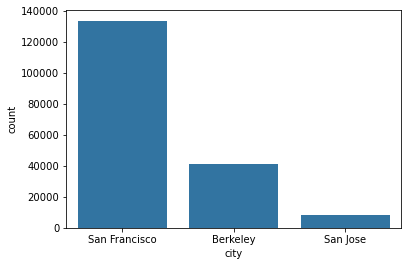

In [18]:
#Create a city column
df.loc[df.start_station_longitude < -122.3537, 'city'] = 'San Francisco'
df.loc[(df.start_station_longitude > -122.3537) & (df.start_station_longitude < -122.2037), 'city'] = 'Berkeley'
df.loc[df.start_station_latitude < 37.4673, 'city'] = 'San Jose'
sb.countplot(data=df, x='city', color=base_color);

Our station seems ot be mostly located in San Francisco.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> With the excpetion of gender distribution, all findings are expected so far. Younger people riding bikes is expected, spikes in commuting hours is expected, but gender distribution favoures the male disproportionately.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No changes has been made to the structure of the data. Some cleaning steps were done and documented and some new features are added to dataset, like start_hour and city

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Let's see which gender tends to take longer trips.

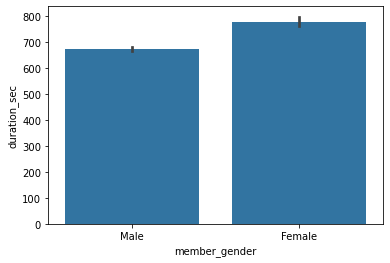

In [19]:
#considering males and females only
sb.barplot(data=df.query('member_gender in ["Male", "Female"]'), x='member_gender', y='duration_sec', color=base_color);

Although the females are under represented in our data, they tend to take longer trips than males.

Let's see the same relationship, but for user type.

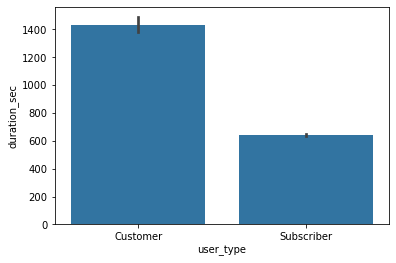

In [20]:
sb.barplot(data=df, x='user_type', y='duration_sec', color=base_color);

One time customers tend to take longer trips than our subscribers.

Is there a relationship between age and trip time?

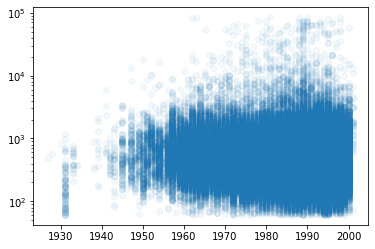

In [21]:
plt.scatter(data=df, x='member_birth_year', y='duration_sec', alpha=0.05)
plt.yscale('log');

Although some old people are taking pretty long trips, it's obvious there's a positive correlation between trip duration and birth year. This indicates negative correlation between trip duration and age, i.e. younger people tend to have longer trips.

Let's also look at how many stations there are in each city.

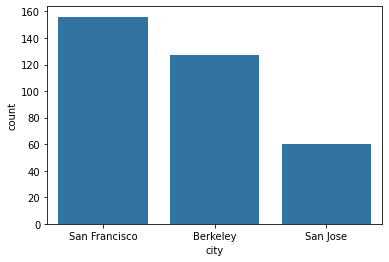

In [22]:
sb.countplot(data=df.drop_duplicates(subset=[c for c in df.columns if 'start_station' in c]), x='city', color=base_color);

No wonder San Jose doesn't have as many trips as the other two cities. It has many fewer stations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Females tend to take longer trips than males. Also one time customers tend to hog the bikes longer than subscribers. Relation between trip duration and rider age depicts a negative correlation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> San Jose could be considered an underserved city in terms of number of bike stations and also considering its size.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let's look at the relation number of trips booked, city and member gender.

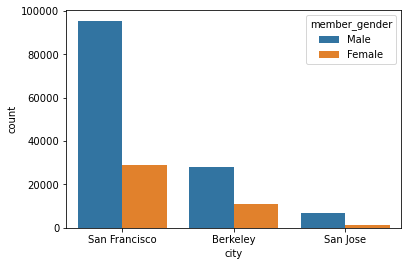

In [23]:
sb.countplot(data=df.query('member_gender in ["Male", "Female"]'), x='city', hue='member_gender');

Looks like the gender ratio is distributed almost the same across the cities.

Let's look at the same relation, but for user type instead of gender.

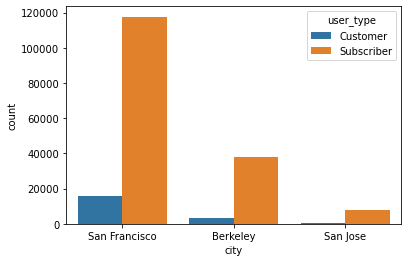

In [24]:
sb.countplot(data=df, x='city', hue='user_type');

Now, let's look at if trip start time tends to change across cities.

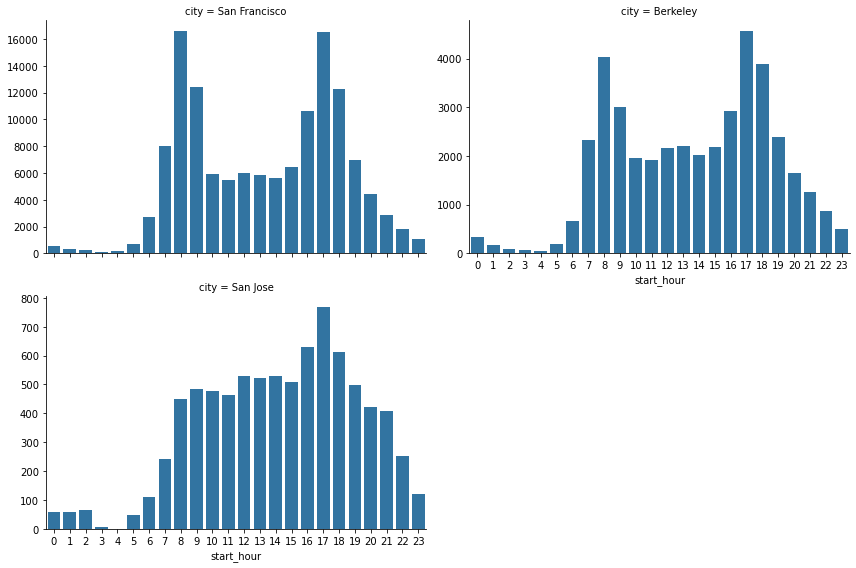

In [29]:
g = sb.FacetGrid(data=df, col='city', col_wrap=2, sharey=False, height=4, aspect=9/6)
g.map(sb.countplot, 'start_hour', order=range(0,24));

Looks like San Francisco and Berkely are the ones driving the trend of booking spikes during rush hours. For some reason, people in San Jose don't follow the same trend. Perhaps they are using the service recreationaly.

Let's also look at whether or not people participating in the "bike share for all" program tend to use for commuting.

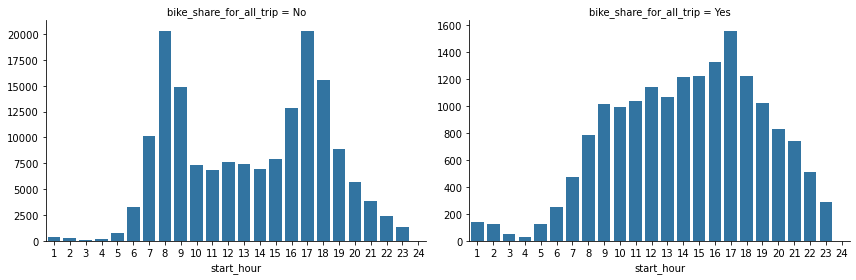

In [26]:
g = sb.FacetGrid(data=df, col='bike_share_for_all_trip', sharey=False, height=4, aspect=9/6)
g.map(sb.countplot, 'start_hour', order=range(1,25));

Apparently they doen't. People not in that program seem to be driving the trend of ruch hour booking spikes.

How about weekend vs non-weekend bookings? And how does the rider gender affect that?

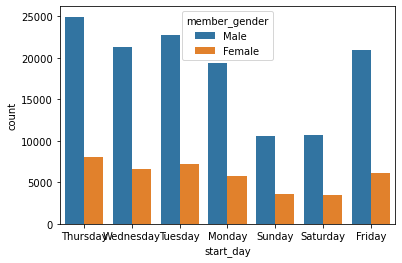

In [27]:
df['start_day'] = df.start_time.dt.day_name()
sb.countplot(data=df.query('member_gender in ["Male", "Female"]'), x='start_day', hue='member_gender');

Indeed, more bookings are made during the week by both men and women. This makes sense sense a lot of people are using the service for commuting.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The majority of rides booked tend to happen in rush hours or commuting times. This is emphasiszed by the fact that more trips happen during the week than in the weekend. This is also emphasized by the fact that such ruch hour trips are taken by people not in the bike share for all program, which is designed for low-income people who might not have regular 8-5 jobs.

### Were there any interesting or surprising interactions between features?

> The fact that people's use of the service in San Jose doesn't seem to be oriented towards commuting stands out. Perhaps the company should increase the number of bike staitions there.